# Question 1
Compute a sample path of a Brownian motion at all resolutions $(h_i, i = 1, . . . , 10)$ with $h_i = 2^{-i}$
based on the same noise. Plot your result and explain 

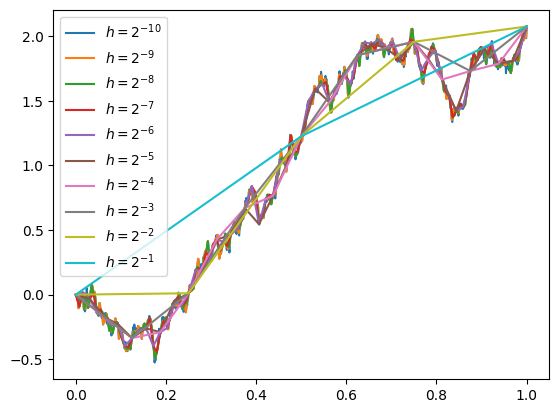

In [463]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt
np.random.seed()
res = 10
h=2**-res
eta= np.random.randn(2**res)*np.sqrt(h) # N(0,h)
fig, ax = plt.subplots()
for i in range(res): 
    h = 2**-(res-i)
    W = np.zeros(2**(res-i)+1)
    for j in range(len(W)-1):
        W[j+1] = W[j] + eta[j]
    
    ax.plot(np.arange(0,1+h,h),W,label = r"$h=2^{-%d}$" % (res-i))
    eta = [eta[k]+eta[k+1] for k in range(0,len(eta),2)] 
ax.legend()
plt.show()

# Question 2
Let $μ := 2$ and $σ := 1$ and $hi = 2^{-i}$. Compute a sample path of $X$ and sample paths $(X_{h_i} , i =
1, . . . , 10)$ based on the same noise. Plot all results in the same graph. Describe your findings.
What do you observe? Is there a difference to the plot in Question 1?

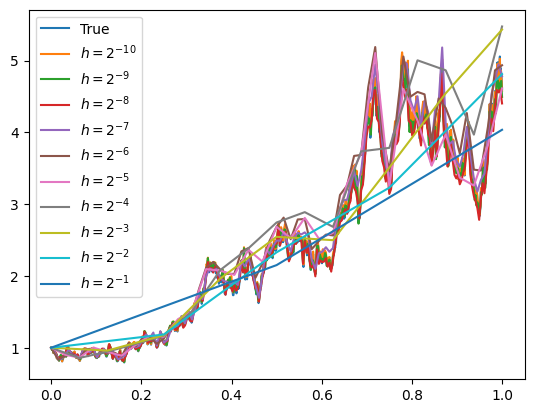

In [464]:
#Question 2
mu=2
sigma = 1

res = 10
h = 2**-res
eta =np.sqrt(h)*np.random.randn(2**res) # N(0,h)

W= np.zeros(2**(res)+1) # Simulation browninan motion at high resolution
for j in range(len(W)-1):
    W[j+1] = W[j] + eta[j]

X = np.exp((mu-sigma**2/2)*np.arange(0,1+h,h) + sigma*W)
fig, ax = plt.subplots()
ax.plot(np.arange(0,1+h,h),X,label ="True")
Xaproxs = [[] for i in range(res)]
for i in range(res): 
    h = 2**-(res-i)
    Xaprox = np.ones(2**(res-i)+1)
    for j in range(len(Xaprox)-1):
        Xaprox[j+1] = Xaprox[j]*(1+h*mu + sigma*eta[j])
    Xaproxs[res-1-i] = Xaprox
    ax.plot(np.arange(0,1+h,h),Xaprox,label = r"$h=2^{-%d}$" % (res-i))
    eta = [eta[k]+eta[k+1] for k in range(0,len(eta),2)] 
ax.legend()
plt.show()

# Question 3

Estimate the strong error with a Monte Carlo simulation based on $M = 1000$ (or more if you like)
for all $(h_i, i = 1, . . . , 10)$. Plot your results with $h$ in the $x$-axis and the strong error in the $y$-axis
in a loglog plot and add a reference slope $h^{1/2}$. Describe your findings.

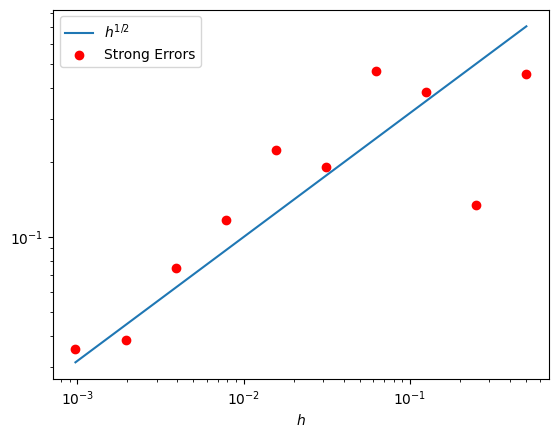

In [465]:
#Question 3
import random
M=1000
strong_errors = np.zeros(res)
h = np.zeros(res)
for i in range(res):
    h[i] = 2**-(i+1)
    indexes = np.random.choice(range(1,2**(i+1)+1),M)
    X_indexes = np.ceil((len(X))*indexes/(2**(i+1))).astype(np.int_) -1
    strong_errors[i] = np.sqrt(1/M * np.sum((X[X_indexes]-Xaproxs[i][indexes])**2))
fig, ax = plt.subplots()
ax.loglog(h,np.sqrt(h), label = r'$h^{1/2}$')
ax.scatter(h,strong_errors,label="Strong Errors",c='r')
ax.legend()
ax.set_xlabel(r"$h$")
plt.show()
    

In [466]:
M=10
for i in range(res):
    h = 2**-(i+1)
    indexes = np.random.choice(range(1,2**(i+1)+1),M)
    X_indexes = np.ceil((len(X))*indexes/(2**(i+1))).astype(np.int_) -1
    print(indexes)
    print(X_indexes)
    #print(X[X_indexes])

[1 1 2 2 1 2 1 2 1 1]
[ 512  512 1024 1024  512 1024  512 1024  512  512]
[3 4 3 3 3 1 1 3 2 1]
[ 768 1024  768  768  768  256  256  768  512  256]
[3 1 6 7 1 8 3 3 6 8]
[ 384  128  768  896  128 1024  384  384  768 1024]
[ 8  1  1  6 10 11 15 16  9 15]
[ 512   64   64  384  640  704  960 1024  576  960]
[ 8 16 12 25  2 16 14 14  9  4]
[256 512 384 800  64 512 448 448 288 128]
[ 6 44 11 30 37 62  9 46 44 15]
[ 96 704 176 480 592 992 144 736 704 240]
[ 10  29  43  95 104  69 120  10 106  81]
[ 80 232 344 760 832 552 960  80 848 648]
[ 29  90 225  56  14 221   4  60 137 124]
[116 360 900 224  56 884  16 240 548 496]
[ 61 386  48 162 134 341  36 432 418 457]
[122 772  96 324 268 682  72 864 836 914]
[670  75 837 535 852 116 985 707 270 558]
[670  75 837 535 852 116 985 707 270 558]
